In [1]:
import sys
python = sys.executable # get python executable path
print(python)

for i in ["numpy",  "scipy", "matplotlib", "pandas", "opencv-python", "opencv-contrib-python"]: # declare what packages we need
  print(f"Installing: {i}")
  ! $python -m pip install $i # install packages calling bash command from the notebook, e.g. "/usr/bin/python -m pip install numpy"

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import urllib.request
import cv2
import copy

/usr/bin/python3
Installing: numpy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Installing: scipy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Installing: matplotlib
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Installing: pandas
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Installing: opencv-python
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Installing: opencv-contrib-python
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Загрузка изображения

In [147]:
url = 'https://www.prlib.ru/sites/default/files/styles/node/public/img/news/d52a3203.jpg?itok=XD2Dk-UW'
urllib.request.urlretrieve(url, "image.jpg") 

('image.jpg', <http.client.HTTPMessage at 0x7f31d63d8130>)

In [148]:
image = np.array(Image.open('image.jpg'))

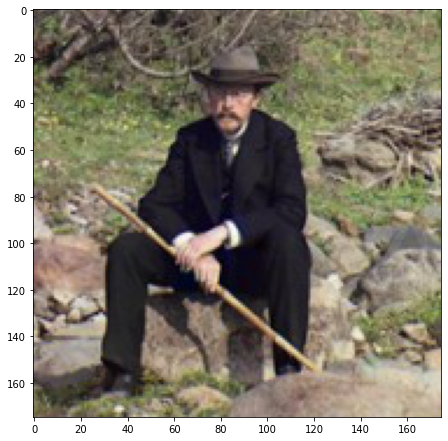

In [149]:
fig = plt.figure(figsize = (7.5, 7.5))
plt.imshow(image)
plt.show()

# Задание 1 Изменение размера изображения

1. Реализовать функцию resize_nn(img, size_factor) которая увеличивает изображение методом ближайшего соседа (size_factor > 1)
2. Реализовать функцию resize_bilinear(img, size_factor) которая увеличивает изображение методом билинейной интерполяции (size_factor > 1)
3. Отобразить результаты функций


In [150]:
def resize_nn(image, size_factor): 
  base_height, base_width = image.shape[0], image.shape[1]
  resized_height, resized_width = np.round(np.dot(size_factor, (base_height, base_width))).astype(int)
  resized_image = np.zeros((resized_height, resized_width, 3), dtype=np.uint8)
  for y in range(resized_height):
    base_Y = (y * (base_height/resized_height)).astype(int) 
    for x in range(resized_width):
      base_X = (x * (base_width/resized_width)).astype(int)
      resized_image[y][x] = image[base_Y][base_X].astype(int)
  return resized_image

In [151]:
def resize_bilinear(image, size_factor):
  base_height, base_width = image.shape[0], image.shape[1]
  resized_height, resized_width = np.round(np.dot(size_factor, (base_height, base_width))).astype(int)
  resized_image = np.zeros((resized_height, resized_width, 3), dtype=np.uint8)
  interpolation_coef = 0.5
  for y in range(resized_height):
    base_Y = ((y) * (base_height/resized_height) - 1)
    for x in range(resized_width):
      base_X = ((x) * (base_width/resized_width) - 1)
      F_x_up = (1.0 - interpolation_coef) * image[np.floor(base_Y).astype(int)][np.floor(base_X).astype(int)] + interpolation_coef * (image[np.ceil(base_Y).astype(int)][np.floor(base_X).astype(int)])
      F_x_down = (1.0 - interpolation_coef) * image[np.floor(base_Y).astype(int)][np.ceil(base_X).astype(int)] + interpolation_coef * (image[np.ceil(base_Y).astype(int)][np.ceil(base_X).astype(int)]) 
      F_y = (1.0 - interpolation_coef) * F_x_up + interpolation_coef * F_x_down
      resized_image[y][x] = F_y
  return resized_image

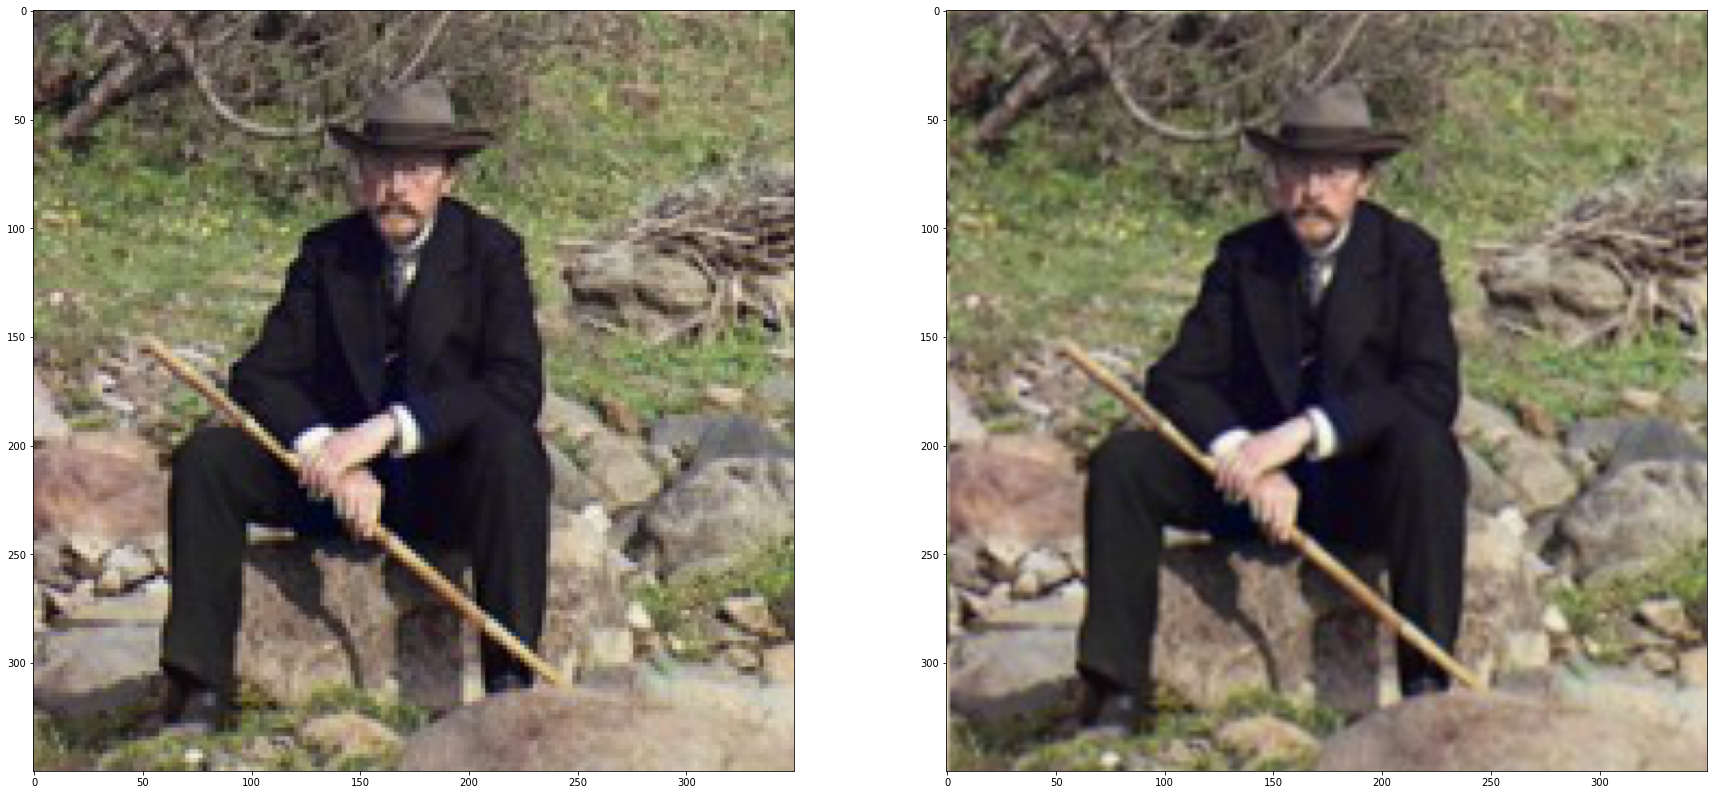

In [152]:
image_resize_nn = resize_nn(image, 2)
image_resize_bilinear = resize_bilinear(image, 2)

fig, ax = plt.subplots(1, 2, figsize=(30, 30))
ax[0].imshow(image_resize_nn)
ax[1].imshow(image_resize_bilinear)

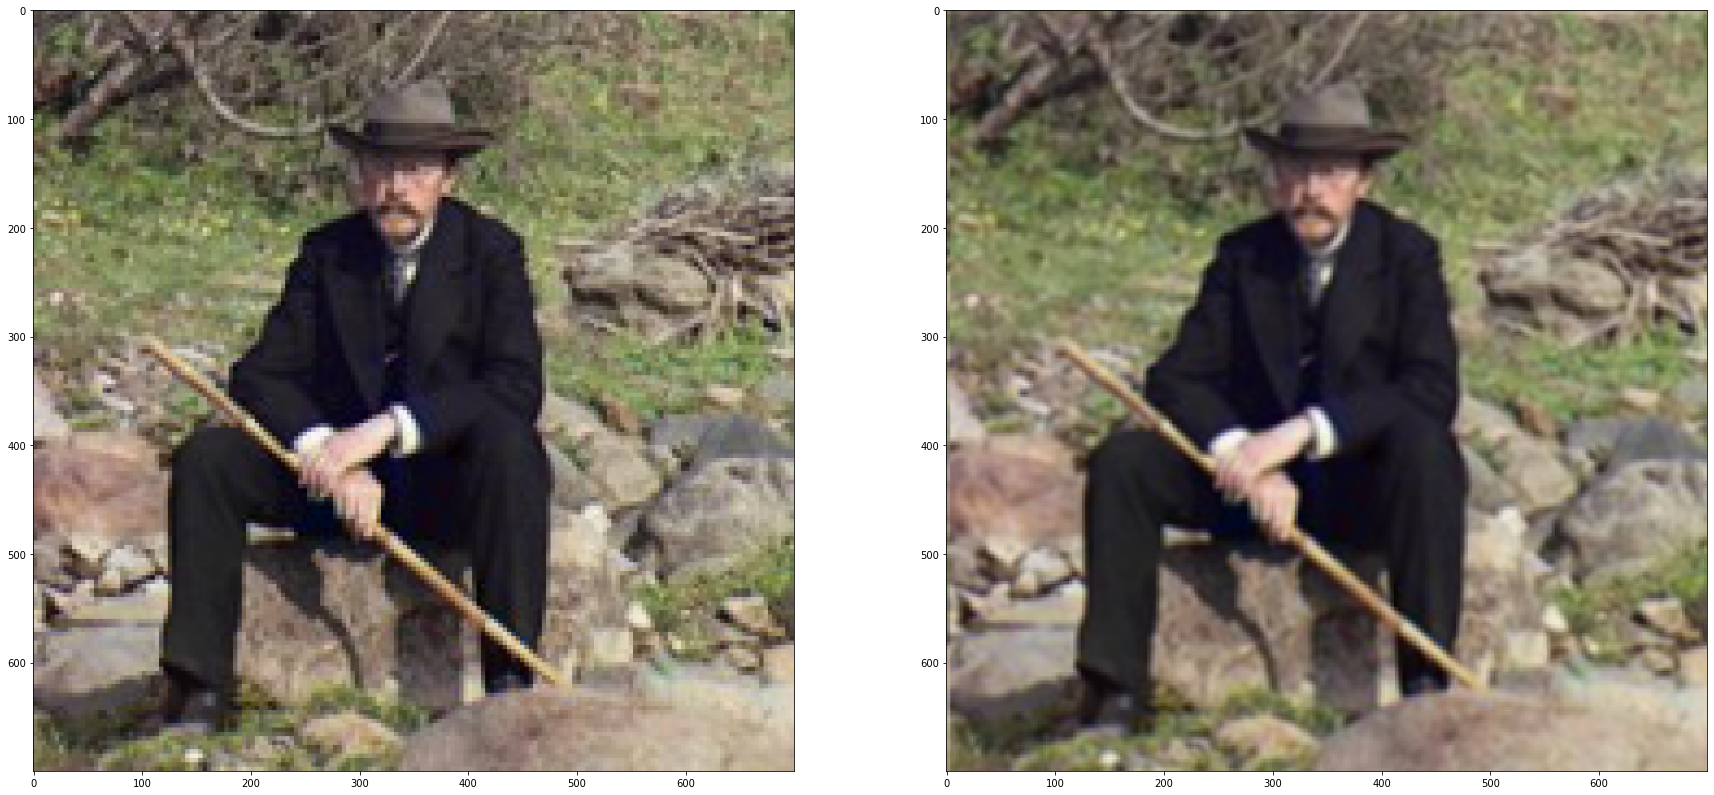

In [153]:
image_resize_nn = resize_nn(image, 4)
image_resize_bilinear = resize_bilinear(image, 4)

fig, ax = plt.subplots(1, 2, figsize=(30, 30))
ax[0].imshow(image_resize_nn)
ax[1].imshow(image_resize_bilinear)

# Задание 2 Сжатие изображения

1. Реализовать функцию downsample_1(img, size_factor) (size_factor > 1), которая сжимает в size_factor раз изображение первым способом из лекции
2. Реализовать функцию downsample_2(img, size_factor) которая которая сжимает в size_factor раз изображение усреднением
3. Отобразить результаты функций




In [154]:
def downsample_1(image, size_factor):
  base_height, base_width = image.shape[0], image.shape[1]
  resized_height, resized_width = np.round(np.dot(1/size_factor, (base_height, base_width))).astype(int)
  resized_image = np.zeros((resized_height, resized_width, 3), dtype=np.uint8)
  for y in range(resized_height):
    base_Y = (y * (base_height/resized_height)).astype(int)
    for x in range(resized_width):
      base_X = (x * (base_width/resized_width)).astype(int)
      resized_image[y][x] = image[base_Y][base_X].astype(int)
  return resized_image

In [155]:
def downsample_2(image, size_factor, smooth_coef = 2):
  base_height, base_width = image.shape[0], image.shape[1]
  resized_height, resized_width = np.round(np.dot(1/size_factor, (base_height, base_width))).astype(int)
  resized_image = np.zeros((resized_height, resized_width, 3), dtype=np.uint8)
  for y in range(resized_height):
    base_Y = (y * (base_height/resized_height)).astype(int)
    for x in range(resized_width):
      base_X = (x * (base_width/resized_width)).astype(int)
      resized_image[y][x] = np.mean(image[base_Y - smooth_coef:base_Y + smooth_coef, base_X - smooth_coef:base_X + smooth_coef], axis=(0, 1))
  return resized_image[2:,2:,:]

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


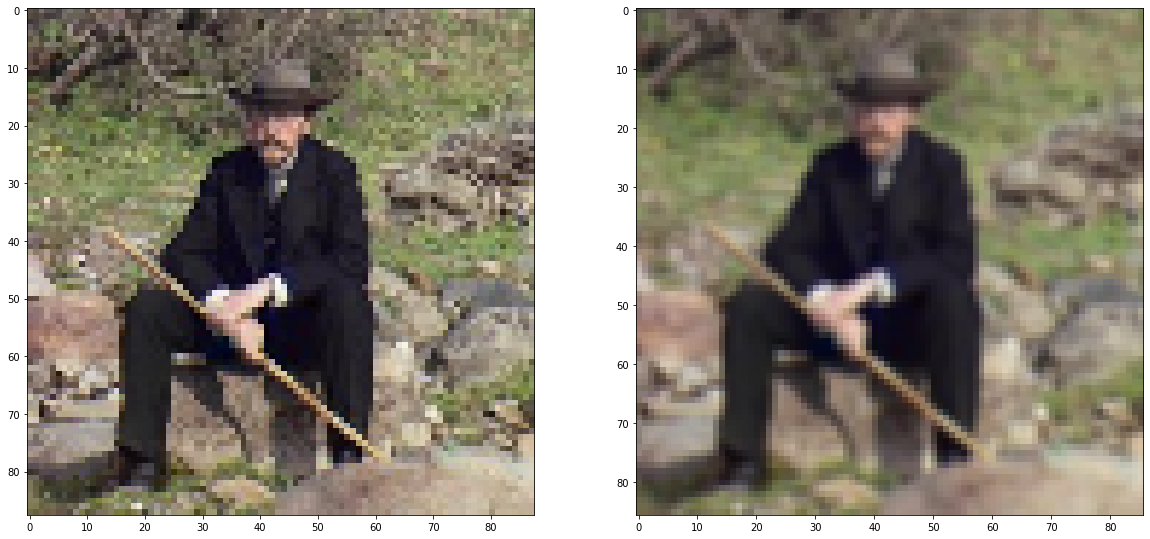

In [156]:
image_downsample_1 = downsample_1(image, 2)
image_downsample_2 = downsample_2(image, 2)

fig, ax = plt.subplots(1, 2, figsize=(20, 20))
ax[0].imshow(image_downsample_1)
ax[1].imshow(image_downsample_2)

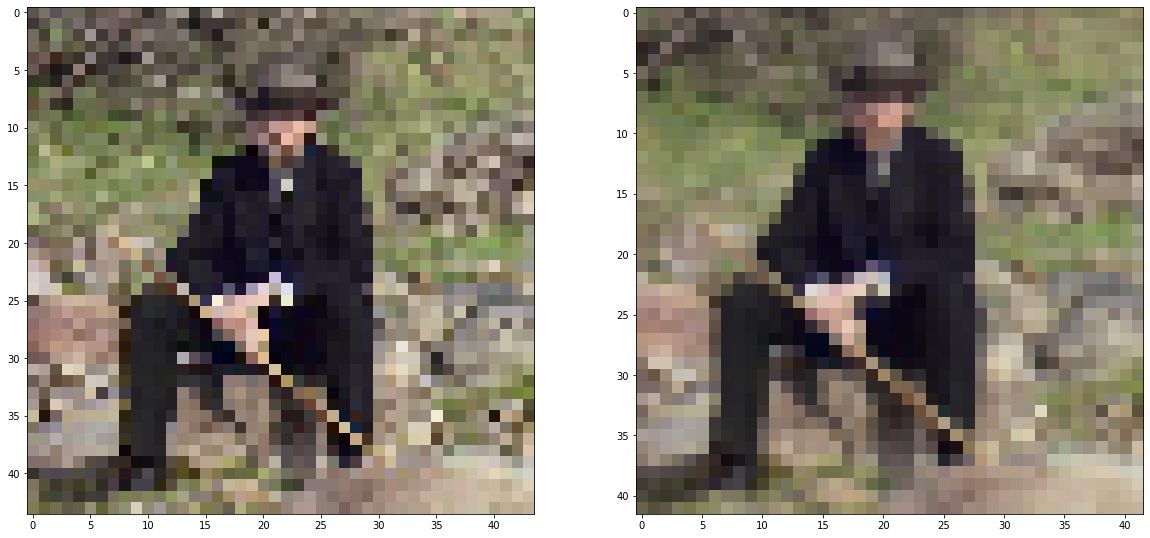

In [157]:
image_downsample_1 = downsample_1(image, 4)
image_downsample_2 = downsample_2(image, 4)

fig, ax = plt.subplots(1, 2, figsize=(20, 20))
ax[0].imshow(image_downsample_1)
ax[1].imshow(image_downsample_2)

# Задание 3 Изменение яркости

1. Реализовать функцию нормализованной линейной трансформации гистограммы  linear_hist_transform(img, persent=0.05) для монохромных изображений
2. Отобразить изображение и его гистограмму до и после применения преобразования

Преобразовать так, чтобы n % пикселей были больше 255 или меньше 0

In [158]:
def to_monochromatic(image):
  result_image = np.copy(image)
  result_image_mean = result_image.mean(axis=2)
  result_image[:,:,0] = result_image_mean
  result_image[:,:,1] = result_image_mean
  result_image[:,:,2] = result_image_mean
  result_hist = cv2.calcHist([result_image], [0], None, [256], [0, 256])
  return result_image, result_hist

def linear_hist_transform(image, persent):
  result_image = np.copy(image)
  persent /= 2
  min_pixel = np.min(result_image)
  max_pixel = np.max(result_image)
  pixels = []
  for i, elem in enumerate(result_image[:,:,0]):
    for j, value in enumerate(elem):
      pixels.append((value, i, j))
  for pixel in pixels:
    result_image[pixel[1]][pixel[2]] = (pixel[0] - min_pixel) * 255 / (max_pixel - min_pixel)
  for pixel in sorted(pixels)[::-1][:np.floor(persent*image.shape[0]*image.shape[1]).astype(np.uint)]:
    result_image[pixel[1]][pixel[2]] = 255
  for pixel in sorted(pixels)[:np.floor(persent*image.shape[0]*image.shape[1]).astype(np.uint)]:
    result_image[pixel[1]][pixel[2]] = 0
  result_hist = cv2.calcHist([result_image], [0], None, [256], [0, 256])
  return result_image, result_hist

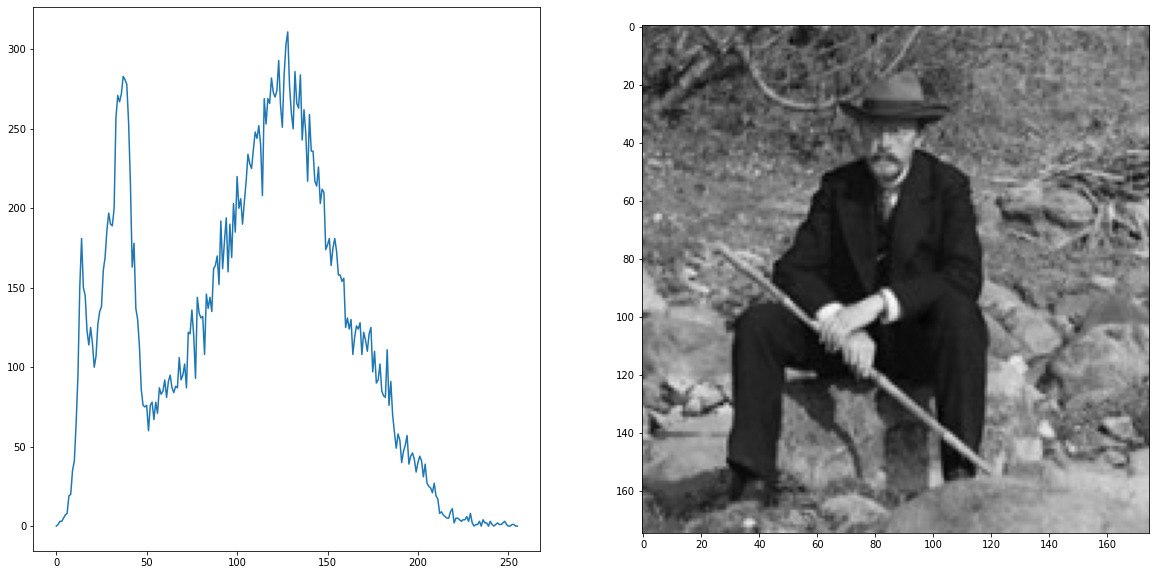

In [159]:
monochromatic_image, monochromatic_hist = to_monochromatic(image)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].plot(monochromatic_hist)
ax[1].imshow(monochromatic_image)

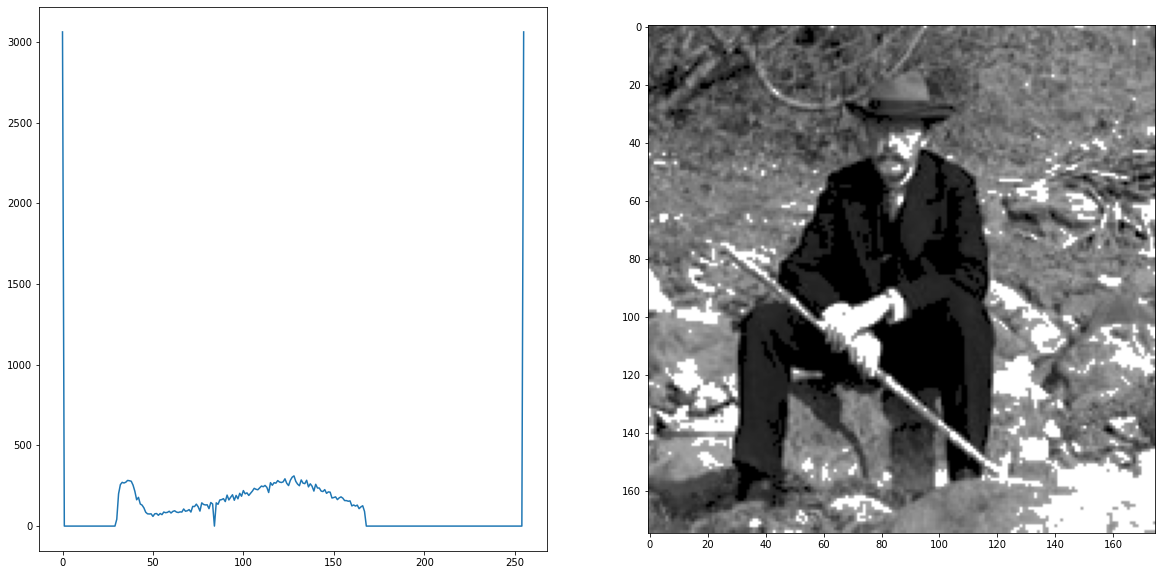

In [160]:
transformed_image, transformed_hist = linear_hist_transform(monochromatic_image, 0.2)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].plot(transformed_hist)
ax[1].imshow(transformed_image)

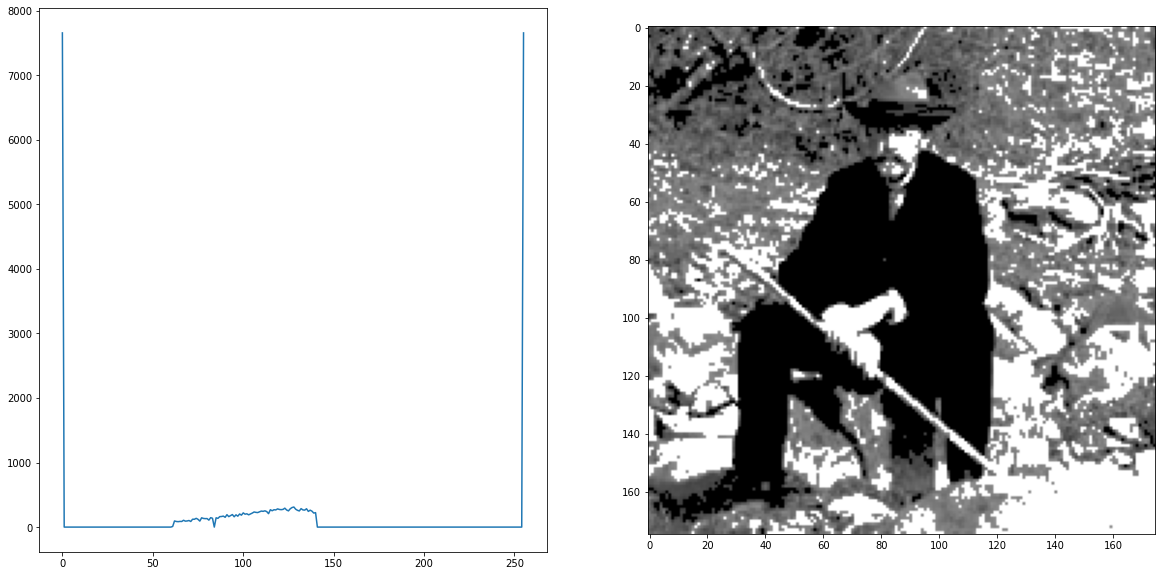

In [161]:
transformed_image, transformed_hist = linear_hist_transform(monochromatic_image, 0.5)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].plot(transformed_hist)
ax[1].imshow(transformed_image)

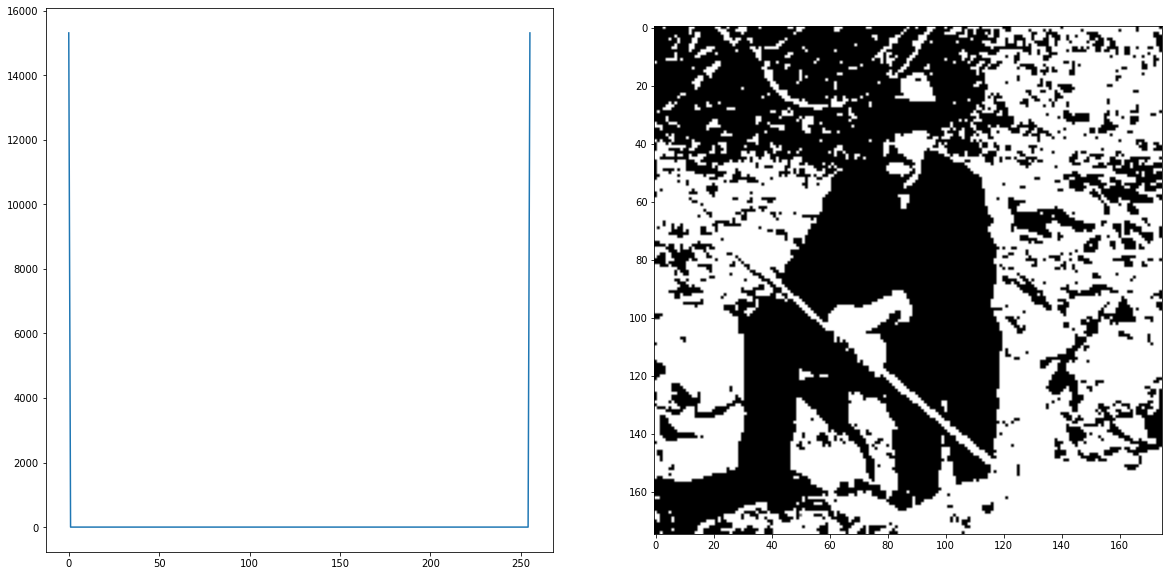

In [162]:
transformed_image, transformed_hist = linear_hist_transform(monochromatic_image, 1)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].plot(transformed_hist)
ax[1].imshow(transformed_image)

# Задание 4 Гамма коррекция

1. Реализовать функцию гамма коррекции gamma_transform(img, gamma) для монохромных изображений
2. Отобразить изображение до и после применения преобразования при разных значениях gamma
3. Перед применением преобразования изображение должно быть нормализовано в [0,1]


In [163]:
def normalize_image(image):
  result_image, _ = to_monochromatic(image)
  normalized_image = cv2.normalize(result_image, None, alpha = 0.01, beta = 1, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
  return normalized_image

def gamma_transform(image, gamma):
  gamma_image = np.copy(image)
  coef_gamma = 1.0 / gamma
  array = np.array([((i / 255.0) ** coef_gamma) * 255 for i in np.arange(0, 256)]).astype(np.uint8)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      gamma_image[i][j] = array[np.dot(gamma_image[i][j], 255).astype(np.uint8)]
  return gamma_image.astype(np.uint8)

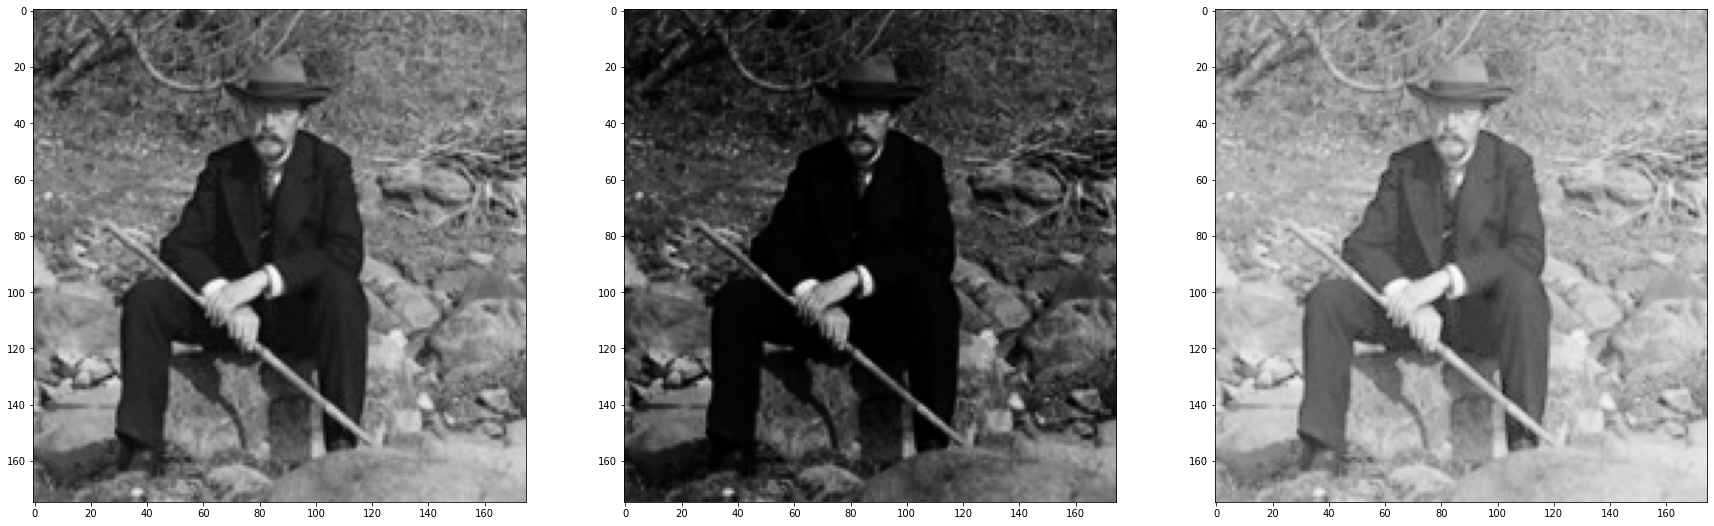

In [164]:
normalized_image = normalize_image(image)
transformed_gamma_image_1 = gamma_transform(normalized_image, 0.5)
transformed_gamma_image_2 = gamma_transform(normalized_image, 2)

fig, ax = plt.subplots(1, 3, figsize=(30, 10))
ax[0].imshow(normalized_image)
ax[1].imshow(transformed_gamma_image_1)
ax[2].imshow(transformed_gamma_image_2)

# Задание 5 Эквализация гистограммы

1. Реализовать функцию hist_eq(img), которая выполняет стандартизации гистограммы для монохромного изображения
2. Отобразить изображение и гистограмму до и после применения функции

In [166]:
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Unequalized_Hawkes_Bay_NZ.jpg/300px-Unequalized_Hawkes_Bay_NZ.jpg"
urllib.request.urlretrieve(url, "image_heq.jpg")

('image_heq.jpg', <http.client.HTTPMessage at 0x7f3217ab16a0>)

In [167]:
image_heq = np.array(Image.open('image_heq.jpg'))

(200, 300)


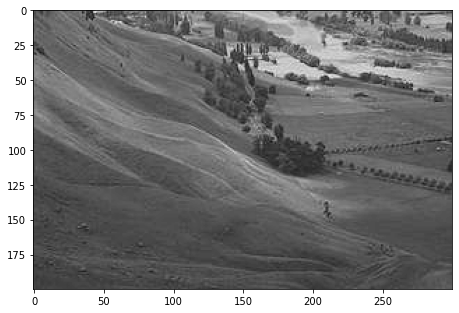

In [172]:
fig = plt.figure(figsize = (7.5, 7.5))
print(image_heq.shape)
plt.imshow(image_heq, 'gray')
plt.show()

In [199]:
def cdf_normalize(image):
  hist,bins = np.histogram(image.flatten(),256,[0,256])
  cdf = hist.cumsum()
  cdf_normalized = cdf * float(hist.max()) / cdf.max()
  return cdf_normalized, cdf

def hist_eq(monochromatic_image):
  equalized_image = np.copy(monochromatic_image)
  cdf_normalized, cdf = cdf_normalize(equalized_image)
  cdf_m = np.ma.masked_equal(cdf,0)
  cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
  cdf = np.ma.filled(cdf_m,0).astype(np.uint8)
  equalized_image2 = cdf[equalized_image]
  equalized_hist = cv2.calcHist([equalized_image2], [0], None, [256], [0, 256])
  return equalized_image2, equalized_hist

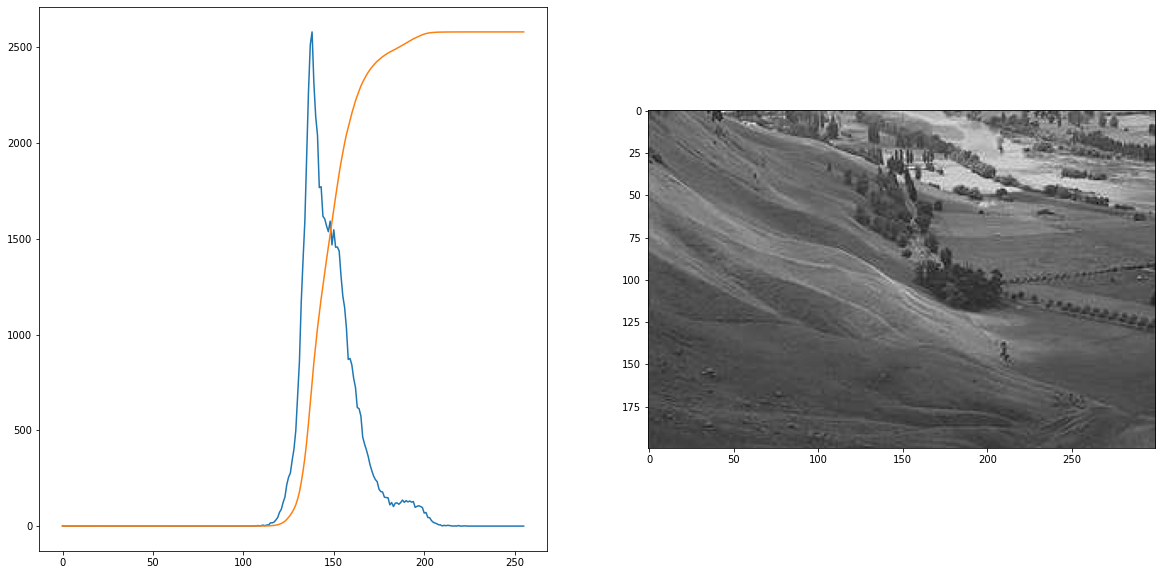

In [200]:
monochromatic_image, monochromatic_hist = image_heq, cv2.calcHist([image_heq], [0], None, [256], [0, 256])

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].plot(monochromatic_hist)
ax[0].plot(cdf_normalize(monochromatic_image)[0])
ax[1].imshow(monochromatic_image, 'gray')

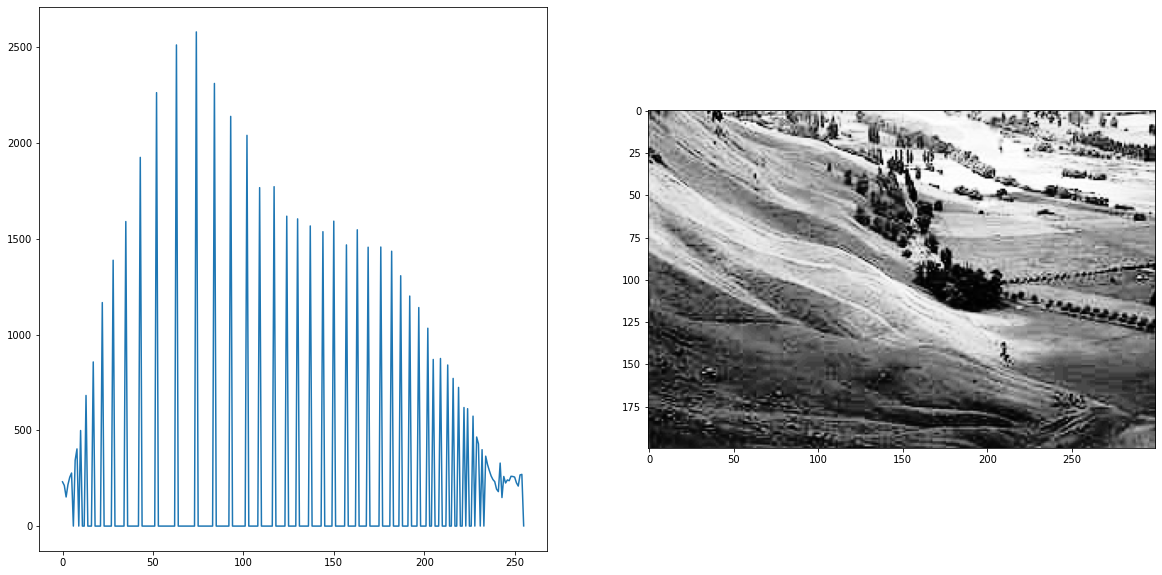

In [201]:
equalized_image, equalized_hist = hist_eq(monochromatic_image)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].plot(equalized_hist)
ax[1].imshow(equalized_image, 'gray')